In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [138]:
data = pd.read_csv('/home/miko/anaconda3/envs/PMLDS/PMLDS/Lab5/data/winequality-red.csv',sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [139]:
X1=data.loc[:,data.columns != 'quality' ]
y=data['quality']

In [140]:
minmax_scaler = MinMaxScaler().set_output(transform="pandas")
X1_normalized = minmax_scaler.fit_transform(X1)
X1_normalized.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

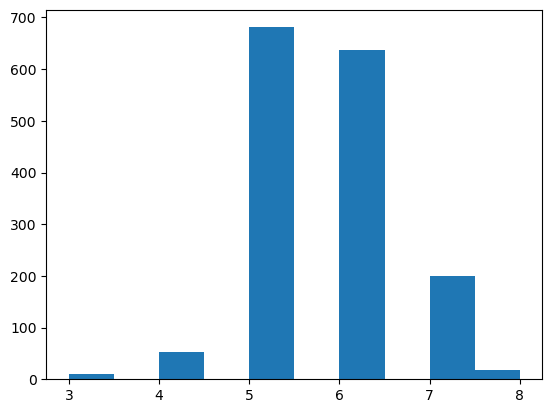

In [141]:
plt.hist(y,align='mid')

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X1_normalized,y,test_size = 0.3,random_state = 42)
X_train1, X_val, y_train1, y_val = train_test_split(X_train,y_train,test_size = 0.3,random_state = 42)

In [143]:
reg_lin = LinearRegression()
reg_lin.fit(X_train1, y_train1)
y_pred_train_lin = reg_lin.predict(X_train1)
y_pred_lin = reg_lin.predict(X_val)

In [144]:
rme_training_lin=sklearn.metrics.mean_squared_error(y_train1,y_pred_train_lin)
rme_val_lin=sklearn.metrics.mean_squared_error(y_val,y_pred_lin)
print(f'rme_training={rme_training_lin}')
print(f'rme_val={rme_val_lin}')

rme_training=0.41399613768919474
rme_val=0.46459500498121065


In [145]:

# simply with almost default parameters
reg_MLP1 = MLPRegressor(random_state=1, max_iter=500)
reg_MLP1.fit(X_train1, y_train1)
y_pred_train_MLP1 = reg_MLP1.predict(X_train1)
y_pred_MLP1 = reg_MLP1.predict(X_val)

rme_training_MLP1=sklearn.metrics.mean_squared_error(y_train1,y_pred_train_MLP1)
rme_val_MLP1=sklearn.metrics.mean_squared_error(y_val,y_pred_MLP1)

# and then try some customization, for example:
reg_MLP2 = MLPRegressor(hidden_layer_sizes=(20,10,8, 5), random_state=1,
max_iter=1000, solver='sgd',activation='relu',learning_rate='adaptive',early_stopping=True,validation_fraction=0.3)

reg_MLP2.fit(X_train1, y_train1)

y_pred_train_MLP2 = reg_MLP2.predict(X_train1)
y_pred_MLP2 = reg_MLP2.predict(X_val)

rme_training_MLP2=sklearn.metrics.mean_squared_error(y_train1,y_pred_train_MLP2)
rme_val_MLP2=sklearn.metrics.mean_squared_error(y_val,y_pred_MLP2)




In [146]:
print(f'rme_training={rme_training_MLP1}')
print(f'rme_val={rme_val_MLP1}')

print(f'rme_training={rme_training_MLP2}')
print(f'rme_val={rme_val_MLP2}')

rme_training=0.40805021553509857
rme_val=0.45264827707440736
rme_training=0.4358078736080623
rme_val=0.41918626499871836


(array([744.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 855.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

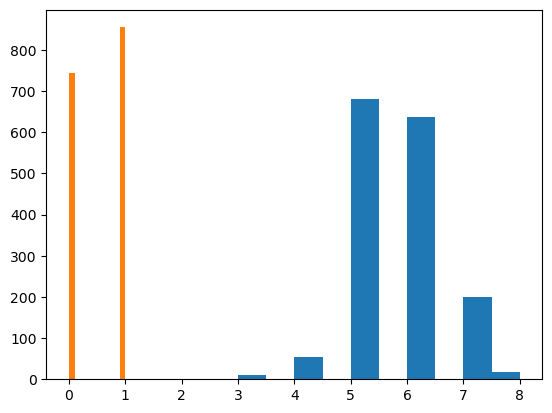

In [163]:
y_class = y.apply(lambda x: 1 if x > 5.8 else 0)
plt.hist(y,align='mid')
plt.hist(y_class,align='mid')

In [161]:
type(y)

pandas.core.series.Series

In [148]:
print(y.shape)
print(y_class.shape)

(1599,)
(1599,)


In [149]:
X_train, X_test, y_class_train, y_class_test = train_test_split(X1_normalized,y_class,test_size = 0.3,random_state = 42)
X_train1, X_val, y_class_train1, y_class_val = train_test_split(X_train,y_class_train,test_size = 0.3,random_state = 42)

In [150]:
clf = sklearn.linear_model.LogisticRegression()

clf.fit(X_train1,y_class_train1)

y_class_pred_train = clf.predict(X_train1)
y_class_pred = clf.predict(X_val)

rme_training_clf=sklearn.metrics.mean_squared_error(y_class_train1,y_class_pred_train)
rme_val_clf=sklearn.metrics.mean_squared_error(y_class_val,y_class_pred)


In [151]:
print(f'rme_training={rme_training_MLP2}')
print(f'rme_val={rme_val_MLP2}')

rme_training=0.4358078736080623
rme_val=0.41918626499871836


In [152]:
acc_train_clf = accuracy_score(y_class_train1, y_class_pred_train)
acc_val_clf = accuracy_score(y_class_val, y_class_pred)
print(f'acc_train_clf={acc_train_clf}')
print(f'acc_val_clf={acc_val_clf}')


acc_train_clf=0.7471264367816092
acc_val_clf=0.7648809523809523


In [153]:
selected_columns=['alcohol', 'volatile acidity', 'total sulfur dioxide', 'sulphates']
selected_columns2=['pH', 'free sulfur dioxide', 'residual sugar', 'fixed acidity']
X2=X1_normalized[selected_columns]
X3=X1_normalized[selected_columns2]
X2.head()


,alcohol,volatile acidity,total sulfur dioxide,sulphates
0,0.153846,0.397260,0.098940,0.137725
1,0.215385,0.520548,0.215548,0.209581
2,0.215385,0.438356,0.169611,0.191617
3,0.215385,0.109589,0.190813,0.149701
4,0.153846,0.397260,0.098940,0.137725


In [154]:
X3.head()

,pH,free sulfur dioxide,residual sugar,fixed acidity
0,0.606299,0.140845,0.068493,0.247788
1,0.362205,0.338028,0.116438,0.283186
2,0.409449,0.197183,0.095890,0.283186
3,0.330709,0.225352,0.068493,0.584071
4,0.606299,0.140845,0.068493,0.247788


In [155]:
X2_train, X2_test, y2_class_train, y2_test = train_test_split(X2,y_class,test_size = 0.3,random_state = 42)
X3_train, X3_val, y3_class_train, y3_test = train_test_split(X3,y_class,test_size = 0.3,random_state = 42)

In [156]:
clf2 = sklearn.linear_model.LogisticRegression()

clf2.fit(X2_train,y2_class_train)

y2_class_pred_train = clf2.predict(X2_train)
y2_class_pred = clf2.predict(X2_test)

rme_training_clf2=sklearn.metrics.mean_squared_error(y2_class_train,y2_class_pred_train)
rme_val_clf2=sklearn.metrics.mean_squared_error(y2_test,y2_class_pred)



clf3 = sklearn.linear_model.LogisticRegression()

clf3.fit(X3_train,y3_class_train)

y3_class_pred_train = clf3.predict(X3_train)
y3_class_pred = clf3.predict(X3_val)

rme_training_clf3=sklearn.metrics.mean_squared_error(y3_class_train,y3_class_pred_train)
rme_val_clf3=sklearn.metrics.mean_squared_error(y3_test,y3_class_pred)



acc_train_clf2 = accuracy_score(y2_class_train, y2_class_pred_train)
acc_val_clf2 = accuracy_score(y2_test, y2_class_pred)

acc_train_clf3 = accuracy_score(y3_class_train, y3_class_pred_train)
acc_val_clf3 = accuracy_score(y3_test, y3_class_pred)


In [159]:
print(f'rme_training_clf2= {rme_training_clf2}')
print(f'rme_val_clf2= {rme_val_clf2}')
print(f'rme_training_clf3= {rme_training_clf3}')
print(f'rme_val_clf3= {rme_val_clf3}')

print(f'acc_train_clf2= {acc_train_clf2}')
print(f'acc_val_clf2= {acc_val_clf2}')
print(f'acc_train_clf3= {acc_train_clf3}')
print(f'acc_val_clf3= {acc_val_clf3}')

rme_training_clf2= 0.2457551385165326
rme_val_clf2= 0.2875
rme_training_clf3= 0.44235924932975873
rme_val_clf3= 0.425
acc_train_clf2= 0.7542448614834674
acc_val_clf2= 0.7125
acc_train_clf3= 0.5576407506702413
acc_val_clf3= 0.575


In [166]:
X_svm_train, X_svm_test, y_svm_train, y_svm_test = train_test_split(X2,y,test_size = 0.3,random_state = 42)

In [169]:
svm_classifier = sklearn.svm.SVC(kernel='rbf')
# Train the SVM classifier
svm_classifier.fit(X_svm_train, y_svm_train)

# Make predictions on the test set
y_pred_train = svm_classifier.predict(X_svm_train)
y_pred_test = svm_classifier.predict(X_svm_test)

svm_classifier2 = sklearn.svm.SVC(kernel='poly')
# Train the SVM classifier
svm_classifier2.fit(X_svm_train, y_svm_train)

# Make predictions on the test set
y_pred_train2 = svm_classifier.predict(X_svm_train)
y_pred_test2 = svm_classifier.predict(X_svm_test)



y_pred_train=sklearn.metrics.mean_squared_error(y_svm_train,y_pred_train)
y_pred_test=sklearn.metrics.mean_squared_error(y_svm_test,y_pred_test)

y_pred_train2=sklearn.metrics.mean_squared_error(y_svm_train,y_pred_train2)
y_pred_test2=sklearn.metrics.mean_squared_error(y_svm_test,y_pred_test2)


In [171]:
print(f'y_pred_train  {y_pred_train}')
print(f'y_pred_test  {y_pred_test}')
print(f'y_pred_train2  {y_pred_train2}')
print(f'y_pred_test2  {y_pred_test2}')


y_pred_train  0.4709562109025916
y_pred_test  0.5020833333333333
y_pred_train2  0.4709562109025916
y_pred_test2  0.5020833333333333
